In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Rename columms

In [2]:
math = pd.read_csv('../../data/raw/student-mat.csv', delimiter=';')

In [3]:
# names may be verbose but I find them more descriptive
column_map = {
    "Pstatus": "parent_cohabitation_status",
    "Medu": "mother's_edu",
    "Fedu": "father's_edu",
    "Fjob": "father's_job",
    "Mjob": "mother's_job",
    "reason": "reason_to_choose_school",
    "schoolsup": "extra_edu_support",
    "famsup": "family_edu_support",
    "paid":"extra_paid_classes",
    "activites": "extra_cirricular_activites",
    "nursery": "attended_nursery",
    "higher": "interested_in_higher_edu",
    "internet": "internet_access",
    "romantic": "in_romantic_relationship",
    "famrel": "quality_of_fam_time",
    "freetime": "free_time_after_school",
    "goout": "goes_out_with_friends",
    "Dalc": "daily_alcohol_consumption",
    "Walc": "weekend_alcohol_consumption",
    "health": "current_health_status",
    "G1": "first_grade_period",
    "G2": "second_grade_period",
    "G3": "final_grade"
}

math = math.rename(columns=column_map)
math.head()

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Check for missing values

In [4]:
# We do not have missing values
math.isna().sum()

school                         0
sex                            0
age                            0
address                        0
famsize                        0
parent_cohabitation_status     0
mother's_edu                   0
father's_edu                   0
mother's_job                   0
father's_job                   0
reason_to_choose_school        0
guardian                       0
traveltime                     0
studytime                      0
failures                       0
extra_edu_support              0
family_edu_support             0
extra_paid_classes             0
activities                     0
attended_nursery               0
interested_in_higher_edu       0
internet_access                0
in_romantic_relationship       0
quality_of_fam_time            0
free_time_after_school         0
goes_out_with_friends          0
daily_alcohol_consumption      0
weekend_alcohol_consumption    0
current_health_status          0
absences                       0
first_grad

### Explore

In [5]:
math.describe()

,age,mother's_edu,father's_edu,traveltime,studytime,failures,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<Axes: xlabel='absences', ylabel='Count'>

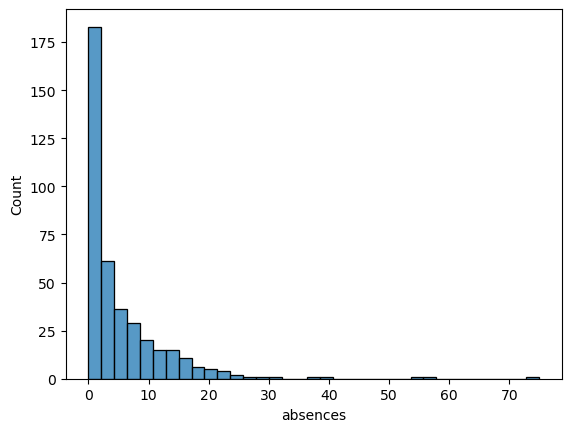

In [6]:
# Visualizing abscences to determine whether to drop outliers

sns.histplot(math['absences'])

In [7]:
math[math['absences'] > 25]

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
280,GP,M,17,U,LE3,A,4,1,services,other,...,4,5,4,2,4,5,30,8,8,8
307,GP,M,19,U,GT3,T,4,4,teacher,services,...,4,3,4,1,1,4,38,8,9,8
315,GP,F,19,R,GT3,T,2,3,other,other,...,4,1,2,1,1,3,40,13,11,11


<Axes: xlabel='absences', ylabel='final_grade'>

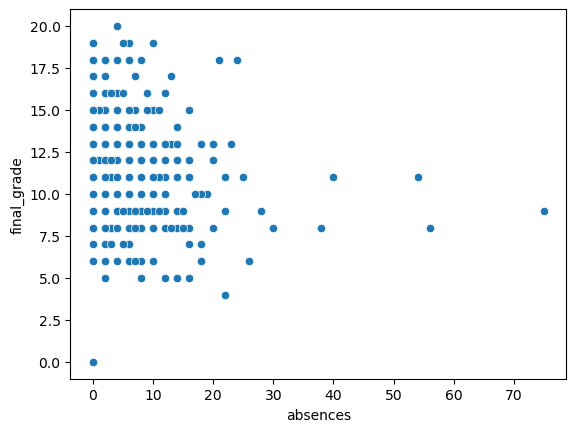

In [8]:
# It appears that many students have the same final grade despite having a vareity in absences
# Some students do just as well as others despite having many abscences
sns.scatterplot(data=math, x='absences', y='final_grade')

In [9]:
# There are 38 students who's final grade is 0
# Each of these students also happen to have 0 absences
# I find this a bit suspicous, perhaps an entry error however for the intial model I have decided to keep all data
# In the next iteration of the model, perhaps we will figure out an appropriate way to handle these values
math[math['final_grade'] == 0]

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


Given that some students have had a large number of abscences, yet have a recorded final grade AND some students have no absences but have a final grade of 0, I decided to include all data for the model. We will determine how to deal with these values in further analysis.

### Dummy variables

In [10]:
# converting binary variable and nominal into dummy variables
# including "drop_first=True" is used to avoid multicollinearity
math_bool = pd.get_dummies(math, drop_first=True)
math_bool

,age,mother's_edu,father's_edu,traveltime,studytime,failures,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,...,guardian_mother,guardian_other,extra_edu_support_yes,family_edu_support_yes,extra_paid_classes_yes,activities_yes,attended_nursery_yes,interested_in_higher_edu_yes,internet_access_yes,in_romantic_relationship_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


In [11]:
#convert bools into 0s and 1s
math_encoded = math_bool.astype(int)
math_encoded

,age,mother's_edu,father's_edu,traveltime,studytime,failures,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,...,guardian_mother,guardian_other,extra_edu_support_yes,family_edu_support_yes,extra_paid_classes_yes,activities_yes,attended_nursery_yes,interested_in_higher_edu_yes,internet_access_yes,in_romantic_relationship_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


### Save data for modeling

In [12]:
math_encoded.to_csv("../../data/processed/cleaned-student-mat.csv", index=False)